# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


/Users/chenliu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/chenliu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Load the Data

In [2]:
dataset=pd.read_csv('Olympic Data Cleaned.csv')
dataset.head(10)

,ID,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
0,67,F,22,179,80,RUS,2008,Athletics,Silver
1,963,M,26,188,80,USA,1996,Athletics,Gold
2,1569,M,25,185,81,GBR,1984,Athletics,Silver
3,1569,M,33,185,81,GBR,1992,Athletics,Bronze
4,1569,M,33,185,81,GBR,1992,Athletics,Bronze
5,1682,F,22,163,61,USA,2016,Athletics,Gold
6,1732,F,29,165,58,RUS,1976,Athletics,Bronze
7,1734,M,21,173,67,RUS,1976,Athletics,Bronze
8,1734,M,25,173,67,RUS,1980,Athletics,Gold
9,2619,F,30,170,62,RUS,1976,Athletics,Bronze


In [3]:
# check missing value
dataset.isnull().sum()


ID        0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Sport     0
Medal     0
dtype: int64

In [4]:
dataset.describe(include="all")

,ID,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
count,1237.000000,1237,1237.000000,1237.000000,1237.000000,1237,1237.000000,1237,1237
unique,NaN,2,NaN,NaN,NaN,6,NaN,5,3
top,NaN,M,NaN,NaN,NaN,USA,NaN,Swimming,Gold
freq,NaN,724,NaN,NaN,NaN,490,NaN,390,490
mean,18297.272433,NaN,23.602264,179.578820,73.371059,NaN,1988.190784,NaN,NaN
std,9900.240883,NaN,4.426157,11.843217,15.634288,NaN,17.120999,NaN,NaN
min,62.000000,NaN,13.000000,136.000000,30.000000,NaN,1960.000000,NaN,NaN
25%,10157.000000,NaN,21.000000,172.000000,61.000000,NaN,1976.000000,NaN,NaN
50%,17487.000000,NaN,23.000000,180.000000,73.000000,NaN,1988.000000,NaN,NaN
75%,27181.000000,NaN,26.000000,188.000000,84.000000,NaN,2004.000000,NaN,NaN


In [5]:
dataset.dtypes

ID         int64
Sex       object
Age        int64
Height     int64
Weight     int64
NOC       object
Year       int64
Sport     object
Medal     object
dtype: object

# EDA

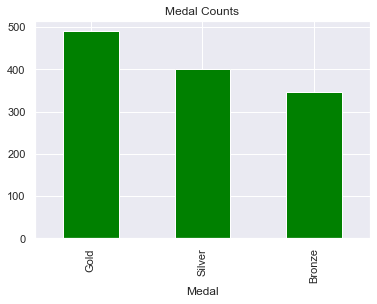

In [6]:
dataset['Medal'].value_counts().plot(kind = 'bar', color = 'green',title = 'Medal Counts')
plt.show()

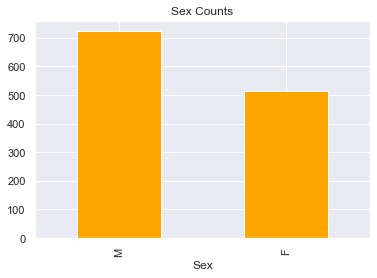

In [7]:
dataset['Sex'].value_counts().plot(kind = 'bar', color = 'orange',title = 'Sex Counts')
plt.show()

<BarContainer object of 25 artists>

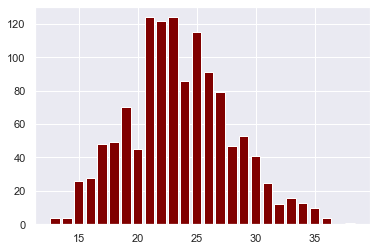

In [8]:
age_dist=dataset['Age'].value_counts().reset_index().sort_values('Age',ascending=True)
plt.bar(age_dist['Age'],age_dist['count'],color = 'maroon')

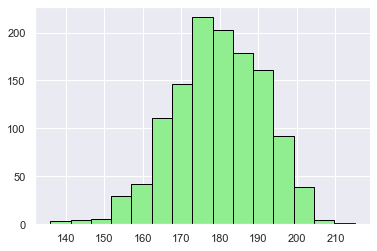

In [9]:
import matplotlib.pyplot as plt

plt.hist(dataset['Height'], color='lightgreen', ec='black', bins=15)
plt.show()

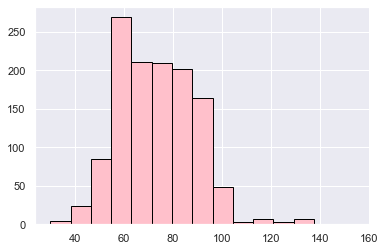

In [10]:
plt.hist(dataset['Weight'], color='pink', ec='black', bins=15)
plt.show()

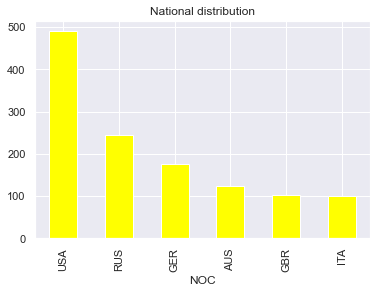

In [11]:
dataset['NOC'].value_counts().plot(kind = 'bar', color = 'yellow',title = 'National distribution')
plt.show()

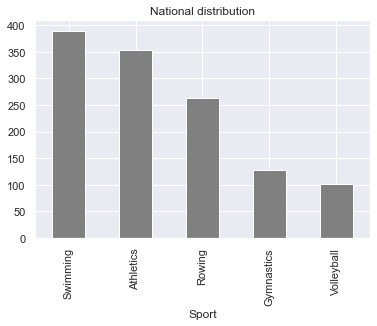

In [12]:
dataset['Sport'].value_counts().plot(kind = 'bar', color = 'gray',title = 'National distribution')
plt.show()

In [54]:
# create a funtion to display the plot for the results grouped by nation with total numbers of each metals

def groupby_nation_year(year):
    new_dataset=dataset
    new_dataset['Year']=[str(i) for i in new_dataset['Year'] ]
    df = new_dataset[new_dataset['Year'].str.contains(year)].fillna(0)
    df = df[['NOC', 'Sport', 'Medal']].groupby('Sport').first().groupby('NOC').count()
    df = df.sort_values(by = ['Medal'], ascending=False)
    df = df.T
    df['Year'] = year
    df = df.set_index(['Year'])
    return df


def concate_dfs(lst_dfs):
    new_df=pd.concat(lst_dfs)
    new_df=new_df.fillna(0)
    return new_df

Years=[int(i) for i in dataset["Year"].value_counts().reset_index()["Year"]]
dfs=[]
for year in Years:
    df=groupby_nation_year(year)
    dfs.append(df)
    
new_df=concate_dfs(dfs).reset_index()

# #PLOT BAR_CHART_RACE 
# import bar_chart_race as bcr
# bcr.bar_chart_race(new_df, title='1988 - 2016 Summer Olypmic Games -  Medal Rankings',
#                    fixed_max=False, steps_per_period=50, n_bars=8, period_length=5000, bar_size=.8)

for i in range(len(Years)):
    year=Years[i]
    plt.subplot(5,3,i+1)
    data =new_df[new_df['Year']==year]
    data.plot(x="", y=["Age", "Height(in cm)"], kind="bar") 
    plt.xlabel('Total Medal',size=50)
    plt.ylabel('Country',size=50)
    plt.title('Total medals vs all Countries',size=50)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
        

TypeError: first argument must be string or compiled pattern

In [61]:
Years

[1988,
 1984,
 1980,
 2016,
 1976,
 1964,
 2012,
 2004,
 1972,
 2000,
 1960,
 1992,
 2008,
 1968,
 1996]

# declare feature

In [ ]:
cols=['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Sport']
X = dataset[cols]
Y = dataset['Medal']

# split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 666)

In [ ]:
X_train.shape, X_test.shape